pip install scikit-learn


imports and structuring path 

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocessing import load_data, create_dataset, split_dataset

import sys
sys.path.append('..')


setting all paths

In [5]:
csv_path = "../data/labels.csv"       
images_dir = "../data/raw"            


checking data and spread

In [6]:
df = load_data(csv_path, images_dir)
print(f"Total samples: {len(df)}")
print(df.head())

print(df['label'].value_counts())


Total samples: 4461
                           path  label
0    ../data/raw/Cancer (1).jpg      1
1    ../data/raw/Cancer (1).tif      1
2   ../data/raw/Cancer (10).jpg      1
3   ../data/raw/Cancer (10).tif      1
4  ../data/raw/Cancer (100).jpg      1
label
1    2421
0    2040
Name: count, dtype: int64


In [7]:
X, y = create_dataset(df, target_size=(256, 256))
print(f"Image data shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Image data shape: (4461, 256, 256, 3)
Labels shape: (4461,)


visualizing images

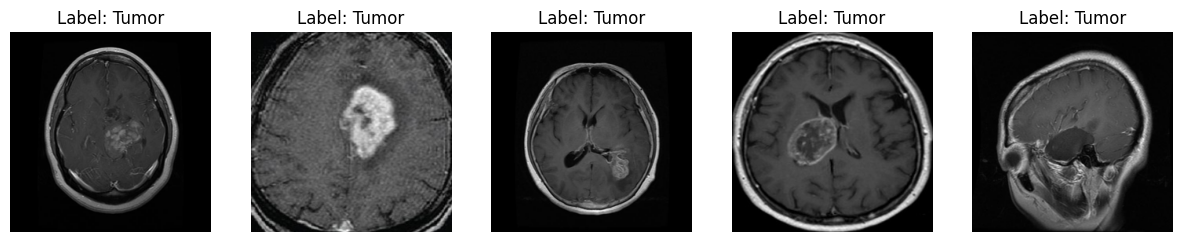

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(X[i])
    axs[i].set_title(f"Label: {'Tumor' if y[i] == 1 else 'No Tumor'}")
    axs[i].axis('off')
plt.show()


training models

In [9]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_dataset(X, y)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


Train size: 3122
Validation size: 669
Test size: 670


saving data

In [12]:
np.save("../data/processed/X_train.npy", X_train)
np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/X_val.npy", X_val)
np.save("../data/processed/y_val.npy", y_val)
np.save("../data/processed/X_test.npy", X_test)
np.save("../data/processed/y_test.npy", y_test)
